## Chap 3 Probability and Information Theory

### 3.1 Why Probability?
Probability theory is a mathematical framework for representing uncertain statements

__Frequentist Probability__ related directly to the rates at which events occur __Bayesian Probability__ related to qualitative levels
of certainty

### 3.2 Random Variables

### 3.3 Probability Distributions


### 3.4 Marginal probability
The probability distribution over the subset is known as the __marginal probability distribution__.
- Discrete random variable
    - $$\forall x \in x, \; P(x=x)=\sum_{y}{P(x=x,y=y)}$$
- Continuous random variable
    - $$P(x)=\int {p(x,y)dy}$$

### 3.5 Conditional Probability


### 3.6 The Chain Rule of Conditional Probabilities
The joint probability distribution over many random variables may be decomposed into conditional distributions over only one variable. This observation is known as the __chain rule__ of probability. 

### 3.7 Independence and Conditional Independence


### 3.8 Expectation, Variance and Covariance
__Expectation E(x)__ is the average or mean value when x is drawn from probability distribution P(x).

__Variance Var(x)__ measures how much the values of a function of a random variable x vary as we sample different 
values of x from its prob dist. 

__Covariance Cov(x,y)__ gives some sense of how much two values are linearly related to each other. 

The notions of __covariance__ and __dependence__ are related, but are in fact __distinct__ concepts. They are related because two variables that are independent have zero covariance, and two variables that have non-zero covariance are dependent. However, independence is a distinct property from covariance. For two variables to have zero covariance, there must be no linear dependence between them. Independence is a stronger requirement than zero coraviance, because independence also excludes nonlinear relations. It is possible for two variables to be dependent but have zero covariance. 

__Covariance Matrix__ of a random vector $x \in R^{n}$ is an $n \times n$ matrix $$Cov(x)_{i,j} = Cov(x_i, x_j)$$
The diagonal elements of the covariance give the variance. $$Cov(x_i, x_i) = Var(x_i)$$

### 3.9 Common Probability Distributions
#### 3.9.1  Bernoulli distribution 
A distribution over a single binary random variable. Controlled by $\phi \in [0,1]$. 
- PDF function: $$P(x=x) = \phi^{x} (1-\phi)^{(1-x)}$$
- Expectation: $$\mathbb{E}_{x}{[x]}=\phi$$
- Variance: $$\mathbb{Var}_{x}{(x)}=\phi (1-\phi)$$

#### 3.9.2 Multinoulli distribution 
A distribution over a single discrete variable with k different states, where k is finite. Controlled by $p \in [0,1]^{k-1}$ where $p_i$ gives the probability of the i-th state.

#### 3.9.3 Gaussian distribution 
Most commonly used distribution over real numbers. 
- PDF function: $$X \sim \mathcal{N}(\mu,\sigma^{2})=\sqrt{\frac{1}{2 \pi \sigma^{2}}} exp(- \frac{1}{2 \sigma^2}(x - \mu)^2)$$
- Expectation: $$\mathbb{E}_{x}{[x]}=\mu$$
- Variance: $$\mathbb{Var}_{x}{(x)}=\sigma^2$$
- Precision: $$ \beta = \frac{1}{\sigma^2} \in (0, \infty)$$ $$X \sim \mathcal{N}(\mu,\beta^{-1})=\sqrt{\frac{\beta}{2 \pi}} exp(- \frac{1}{2} \beta (x - \mu)^2)$$

The central limit theorem shows that the sum of many independent random variables is approximately normally distributed.

Out of all possible probability distributions with the same variance, the normal distribution encodes the maximum amount of uncertainty over the real numbers.

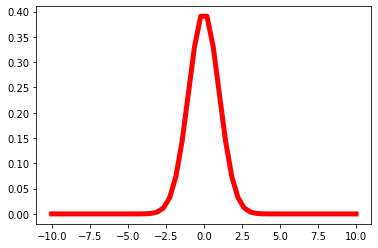

In [10]:
import matplotlib.pyplot as plt
import numpy as np 

from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
rv = norm(0, 1)
x = np.linspace(-10, 10, 50)
ax.plot(x, rv.pdf(x), 'r-', lw=5, label='frozen pdf')

#### 3.9.4 Exponential distribution
- PDF function: 
$$p(x;\lambda) = \left\{\begin{matrix} \lambda e^{-\lambda x} &,\; x \ge 0, \\ 0 &,\; x < 0. \end{matrix}\right.$$
- Expectation: $$\mathbb{E}_{x}{[x]}= \frac{1}{\lambda}$$
- Variance: $$\mathbb{Var}_{x}{(x)}=\frac{1}{\lambda^2}$$

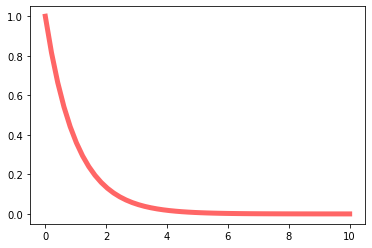

In [11]:
from scipy.stats import expon

fig, ax = plt.subplots(1, 1)
rv = expon(0, 1)
x = np.linspace(0, 10, 50)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')

#### 3.9.4  Laplace distribution
- PDF function: $f(x|\mu,b) = \frac{1}{2b} \exp \left( -\frac{|x-\mu|}{b} \right) \,\!$
$= \frac{1}{2b}
    \left\{\begin{matrix}
      \exp \left( -\frac{\mu-x}{b} \right) & \mbox{if }x < \mu
      \\[8pt]
      \exp \left( -\frac{x-\mu}{b} \right) & \mbox{if }x \geq \mu
    \end{matrix}\right.$
    
- Expectation: $\mu$
- Variance: $2b^2$

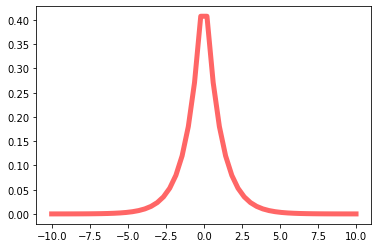

In [12]:
from scipy.stats import laplace
fig, ax = plt.subplots(1, 1)
rv = laplace()
x = np.linspace(-10, 10, 50)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='laplace pdf')

#### 3.9.5 Dirac distribution 
When we wish to specify that all of the mass in a probability distribution clusters around a single point.
- PDF: $$p(x) = \delta(x-\mu)$$
- Dirac function is a special form of normal distribution 

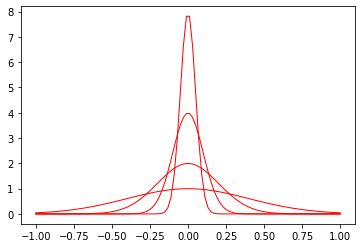

In [13]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
rvs = []
a = [0.05, 0.1, 0.2, 0.4]
for i in range(len(a)):
    rvs.append(norm(0, a[i]))

x = np.linspace(-1, 1, 100)
for i in range(len(a)):
    ax.plot(x, rvs[i].pdf(x), 'r-', lw=1, label='dirac pdf')

#### 3.9.5 Empirical distribution
The Dirac delta distribution is only necessary to define the empirical distribution over continuous variables.
- PDF: $$p(x) = \frac{1}{m} \sum_{i=1}^{m} \delta(x-x^{(i)})$$

#### 3.9.6 Mixture of distributions
Define probability distributions by combining other simpler probability distributions.

__Latent variable__ is a random variable that we cannot observe directly. 

Latent variables may be related to x through the joint distribution, in this case, $P(x,c)=P(x|c)P(c)$. 

The distribution $P (c)$ over the latent variable and the distribution $P(x|c)$ relating the latent variables to the visible variables determines the shape of the distribution $P(x)$ even though it is possible to describe $P(x)$ without reference to the latent variable.

__Gaussian mixture model__ The components $P(x|c=i)$ are Gaussians. Each component has a separately parametrized mean $\mu^{i}$ and covariance $\Sigma^{i}$

### 3.10 Useful Properties of Common Functions
- Logistic sigmoid 
    - $$\sigma(x)=\frac{1}{1+e^{-x}}$$
    - Commonly used to produce the $\phi$ parameter of a Bernoulli distribution because its range is (0,1)
    - Function saturates when its argument is very positive or very negative, meaning that the function becomes very falt and __insensitive__ to small changes in its input. 
    - Another form of sigmoid: $$\sigma(x)=\frac{1}{1+e^{-x}} = \frac{e^x}{e^x+1}$$
    - __Derivative__: $$\frac{d}{dx} \sigma(x) = \sigma(x)(1-\sigma(x))$$
    - __Negative__: $$\sigma(-x) = 1 - \sigma(x)$$
    - __Logrithm__: $$\log( \sigma(x) )= -\zeta(-x)$$
    - __Inverse__: $$\forall x \in (0,1), \; \sigma^{-1}(x) = log(\frac{x}{1-x})$$

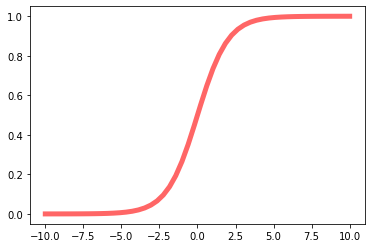

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

fig, ax = plt.subplots(1, 1)
x = np.linspace(-10, 10, 50)
ax.plot(x, sigmoid(x), 'r-', lw=5, alpha=0.6, label='sigmoid')

- Softplus function 
    - $$\zeta(x) = \log(1+e^x)$$
    - Commonly used for producing the $\beta,\sigma$ parameter of a normal distribution because its range is (0,$\infty$)
    - It's a softened version of Relu function 
    - __Derivative__: $$\frac{d}{dx} \zeta(x) = \sigma(x), \; \zeta(x) = \int^{x}_{-\infty} \sigma(y) dy$$
    - __Negative__: $$ \forall x > 0, \; \zeta^{-1}(x) = \log(e^x-1)$$
    - __Inverse__: $$\zeta(x) - \zeta(-x) = x$$

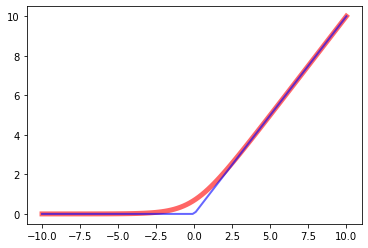

In [15]:
def softplus(x):
    return np.log(np.ones(x.shape[0]) + np.exp(x))
def relu(x):
    return np.maximum(0, x)

fig, ax = plt.subplots(1, 1)
x = np.linspace(-10, 10, 100)
ax.plot(x, softplus(x), 'r-', lw=5, alpha=0.6, label='softplus')    
ax.plot(x, relu(x), 'b-', lw=2, alpha=0.6, label='relu')    

### 3.11 Bayes’ Rule
- $$P(x|y) = \frac{P(x) P(y|x)}{P(y)}$$
    - Known: $P(y|x), \; P(x)$
    - Unknown: $P(x|y)$
    - Need computing: $P(y) = \sum_{x} P(y|x)P(x)$

### 3.12 Technical Details of Continuous Variables
- The handling of continuous random variables that are deterministic functions of one another. 
    - Given two random variables $x \; and \; y$ such that $y=g(x) = 2x$ where g is invertible. However, $p_y(2x) \neq p_x(x)$
    - This mistake fails to account for the distortion of space introduced by the function. 
    - Based on the definition of probability distribution $$|p_y(g(x))dy| = |p_x(x)dx|$$
    - In higher dimensions, the derivative generalizes to the determinant of the Jacobian matrix $$p_x(x) = p_y(g(x)) \left | \det \left( \frac{\partial g(x)}{\partial x} \right) \right |$$

### 3.13 Information Theory
- The basic intuition behind information theory is that learning that an unlikely event has occurred is more informative than learning that a likely event has occured. 
    - Likely events should have low information content. 
    - Less likely events should have hight information content. 
    - Independent events should have additive information. A tossed coin come up as heads twice should give TWICE more information as a coin come up once. 
- To satisfy all 3 properties, we defined the __self information__ of an event to be $$I(x) = - \log P(x)$$
- __Shannon entropy__ of a distribution is the expected amount of information in an event drawn from that distribution. It gives a lower bound on the number of bits needed on average to encode symbols drawn from a distribution P. $$H(x) = \mathbb{E}_{x \sim P} [I(x)]$$
    - Distribution that is nearly deterministic has low entropy
    - Distribution that is close to uniform has high entropy

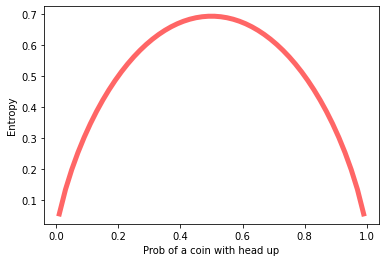

In [20]:
def entropy(p):
    return (p-1)*np.log(1-p)-p*np.log(p)

fig, ax = plt.subplots(1, 1)
x = np.linspace(0.01, 0.99, 50)
ax.set_xlabel('Prob of a coin with head up')
ax.set_ylabel('Entropy')
ax.plot(x, entropy(x), 'r-', lw=5, alpha=0.6, label='entropy')  

__Figure__ This plot shows how distributions that are closer to deterministic have low Shannon entropy while distributions that are close to uniform have high Shannon entropy. On the horizontal axis, we plot p, the probability of a binary random variable being equal
to 1. The entropy is given by $-(1 − p) \log(1 − p) − p \log p$. 

> 今天擲一枚硬幣有p的機率正面朝上，如果p=1/p=0（不管怎麼丟正面都朝上/下）則每一次擲硬幣獲得的資訊量很少，如果p=0.5則每擲一次硬幣獲得的資訊量最多

Shannon Entropy of a binary random variable:

\begin{align}
    H(x) &= -\mathbb{E}_{x \sim P}[log P(x)] \\
    &= - [ p * \log p + (1-p)* \log (1-p) ] \\
    &= (p − 1) \log(1 − p) − p \log p \\
\end{align}


If we have two separate probability distributions P (x) and Q (x) over the same random variable x, we can measure __how different these two distributions__ are using the __Kullback-Leibler (KL) divergence__: 
$$D_{KL}(P||Q) = \mathbb{E}_{x \sim P} \left[ \log \frac{P(x)}{Q(x)}\right] = \mathbb{E}_{x \sim P} [\log P(x) - \log Q(x)]$$


The KL divergence has many useful properties, most notably that it is non- negative. The KL divergence is 0 if and only if P and Q are the same distribution in the case of discrete variables, or equal “almost everywhere” in the case of continuous variables.

Because the KL divergence is non-negative and measures the difference between two distributions, it is often conceptualized as measuring some sort of __distance between these distributions.__ However, it is not a true distance measure because it is not symmetric: $D_{KL}(P||Q)= D_{KL}(Q||P)$

A quantity that is closely related to the KL divergence is the __cross-entropy__ 

\begin{align} 
    H(P,Q)  &= H(P)+D_{KL}(P||Q) \\
            &= - \mathbb{E}_{x \sim P}[\log P(x)] + \mathbb{E}_{x \sim P}[\log P(x) - \log Q(x)] \\
            &= - \mathbb{E}_{x \sim P} \log Q(x) \\
\end{align}
which is similar to the KL divergence but lacking the term on the left

> P和Q機率分佈之間的交叉熵 被定義為 P分佈自身的謝農熵 加上 P,Q之間的KL散度 

Minimizing the cross-entropy with respect to Q is equivalent to minimizing the KL divergence, because Q does not participate in the omitted term.

When computing many of these quantities, it is common to encounter expressions of the form 0 log 0. By convention, in the context of information theory, we treat these expressions as $\lim_{x→0} x \log x = 0$


### 3.14 Structured Probabilistic Models
